<a href="https://colab.research.google.com/github/Dum26/Motorbike-identification/blob/main/Motorbike_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
url = '/content/drive/MyDrive/duancuoiki'
img_size = 224
batch = 32

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    url,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',)

validation_generator = test_datagen.flow_from_directory(
    url,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',)

Found 92 images belonging to 12 classes.
Found 92 images belonging to 12 classes.


In [18]:
# Kiến trúc mạng được cải thiện
model = Sequential()
# Bộ 1 Convolution
model.add(Conv2D(filters=64, kernel_size=(5, 5),  padding = 'same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
# Bộ 2 Convolution
model.add(Conv2D(filters=64, kernel_size=(3, 3),  padding = 'same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides = (2,2)))
# Bộ 3 Convolution
model.add(Conv2D(filters=64, kernel_size=(3, 3),  padding = 'same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides = (2,2)))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(12, activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.fit_generator(train_generator,
                    epochs=100,
                    validation_data=validation_generator, verbose=2)


<ipython-input-6-4b17d2e37565>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


Epoch 1/100
3/3 - 57s - loss: 4.9703 - accuracy: 0.1304 - val_loss: 2.7988 - val_accuracy: 0.1630 - 57s/epoch - 19s/step
Epoch 2/100
3/3 - 27s - loss: 2.4734 - accuracy: 0.1413 - val_loss: 2.1512 - val_accuracy: 0.2391 - 27s/epoch - 9s/step
Epoch 3/100
3/3 - 27s - loss: 2.2105 - accuracy: 0.1304 - val_loss: 2.0334 - val_accuracy: 0.3913 - 27s/epoch - 9s/step
Epoch 4/100
3/3 - 28s - loss: 2.1465 - accuracy: 0.2935 - val_loss: 2.0114 - val_accuracy: 0.3261 - 28s/epoch - 9s/step
Epoch 5/100
3/3 - 28s - loss: 2.0817 - accuracy: 0.2065 - val_loss: 1.8076 - val_accuracy: 0.3804 - 28s/epoch - 9s/step
Epoch 6/100
3/3 - 28s - loss: 1.9634 - accuracy: 0.2826 - val_loss: 1.6852 - val_accuracy: 0.3152 - 28s/epoch - 9s/step
Epoch 7/100
3/3 - 26s - loss: 1.7576 - accuracy: 0.2826 - val_loss: 1.5850 - val_accuracy: 0.3913 - 26s/epoch - 9s/step
Epoch 8/100
3/3 - 32s - loss: 1.6812 - accuracy: 0.3261 - val_loss: 1.3552 - val_accuracy: 0.5217 - 32s/epoch - 11s/step
Epoch 9/100
3/3 - 27s - loss: 1.5814 -

In [11]:
model.save('model_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:

#Đánh giá mô hình trên dữ liệu thử nghiệm
test_loss, test_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch)
print(f'Test Accuracy: {test_accuracy}')

2/2 [==============================] - 5s 2s/step - loss: 0.0279 - accuracy: 0.9844
Test Accuracy: 0.984375


1/1 [==============================] - 0s 122ms/step
Kết QUả: Honda Vision


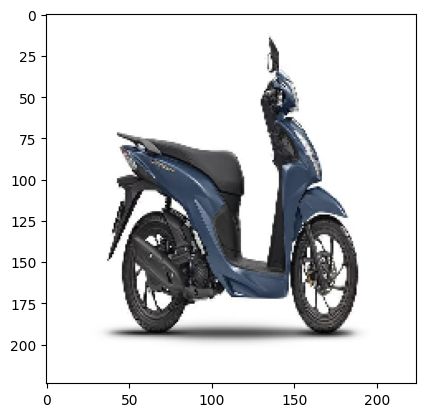

In [17]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
model = load_model('model_1.h5')
def predict_face(image_path):
  img = load_img(image_path, target_size=(224, 224))
  img_array = img_to_array(img) / 255.0
  img_batch = np.expand_dims(img_array, axis=0)
  predictions = model.predict(img_batch)
  predicted_class = np.argmax(predictions[0])
  class_names = ['Dream Thái', 'Honda 67','Honda A Còng','Honda Air Blade','Honda Lead','Honda Vision','Honda Wave','Suzuki FX 125','Suzuki Raider R150','Yamaha Exciter','Yamaha Grande',' Đê Đê (Cub 70)']
  print('Kết QUả: {}'.format(class_names[predicted_class]))
  plt.imshow(img)
  plt.show()
image_path = '/content/drive/MyDrive/duancuoiki/Honda Vision/cGhWsbF8uTl4O67urnkG.jpg'
predict_face(image_path)